<a href="https://colab.research.google.com/github/essential2189/ML_study/blob/main/Hands-On_ML/3.%20Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from sklearn import datasets

iris = datasets.load_iris()

X = iris['data'][:, (2, 3)]  # 꽃잎 길이, 꽃잎 너비
y = iris['target']

In [16]:
import numpy as np

X_b = np.c_[np.ones([len(X), 1]), X]

In [17]:
np.random.seed(2042)

In [18]:
# train_test_split()

test_ratio = 0.2
val_ratio = 0.2
total_size = len(X_b)

test_size = int(total_size * test_ratio)
val_size = int(total_size * val_ratio)
train_size = total_size - test_size - val_size

rand_indices = np.random.permutation(total_size)

X_train = X_b[rand_indices[:train_size]]
y_train = y[rand_indices[:train_size]]

X_val = X_b[rand_indices[train_size:-test_size]]
y_val = y[rand_indices[train_size:-test_size]]

X_test = X_b[rand_indices[-test_size:]]
y_test = y[rand_indices[-test_size:]]

타깃은 클래스 인덱스(0, 1 그리고 2)이지만 소프트맥스 회귀 모델을 훈련시키기 위해 필요한 것은 타깃 클래스의 확률입니다. 각 샘플에서 확률이 1인 타깃 클래스를 제외한 다른 클래스의 확률은 0입니다(다른 말로하면 주어진 샘플에 대한 클래스 확률이 원-핫 벡터입니다). 클래스 인덱스를 원-핫 벡터로 바꾸는 간단한 함수를 작성하겠습니다:

In [19]:
# def to_one_hot(y):
#     y_one_hot = []
#     for i in y:
#         if i == 0:
#             y_one_hot.append([1., 0., 0.])
#         elif i == 1:
#             y_one_hot.append([0., 1., 0.])
#         else :
#             y_one_hot.append([0., 0., 1.])
    
#     return np.array(y_one_hot)

def to_one_hot(y):
    n_classes = y.max() + 1
    m = len(y)
    Y_one_hot = np.zeros((m, n_classes))
    Y_one_hot[np.arange(m), y] = 1
    return Y_one_hot

y_one_hot = to_one_hot(y_train)

print(y_train[:10])
print(y_one_hot[:10])

[0 1 2 1 1 0 1 1 1 0]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]


In [20]:
y_train_one_hot = to_one_hot(y_train)
y_val_one_hot = to_one_hot(y_val)
y_test_one_hot = to_one_hot(y_test)

In [21]:
def softmax(logits):
    exps = np.exp(logits)
    exp_sum = np.sum(exps, axis=1, keepdims=True)
    return exps / exp_sum

In [22]:
n_inputs = X_train.shape[1]  # == 3 (특성 2개와 편향)
n_outputs = len(np.unique(y_train)) # == 3 (3개의 클래스)

구현할 공식은 비용함수입니다:

$J(\mathbf{\Theta}) = \dfrac{1}{m}\sum\limits{i=1}^{m}\sum\limits{k=1}^{K}{y_k^{(i)}\log\left(\hat{p}_k^{(i)}\right)}$

그리고 그레이디언트 공식입니다:

$\nabla_{\mathbf{\theta}^{(k)}} \, J(\mathbf{\Theta}) = \dfrac{1}{m} \sum\limits_{i=1}^{m}{ \left ( \hat{p}^{(i)}_k - y_k^{(i)} \right ) \mathbf{x}^{(i)}}$

$\hat{p}_k^{(i)} = 0$이면 $\log\left(\hat{p}_k^{(i)}\right)$를 계산할 수 없습니다. nan 값을 피하기 위해 $\log\left(\hat{p}_k^{(i)}\right)$에 아주 작은 값 $\epsilon$을 추가하겠습니다.

In [71]:
eta = 0.01
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7

theta = np.random.randn(n_inputs, n_outputs) # 각 클래스의 자신만의 파라미터 벡터

for iteration in range(n_iterations):
    logits = X_train.dot(theta)
    y_proba = softmax(logits)
    if iteration % 500 == 0:
        loss = -np.mean(np.sum(y_train_one_hot * np.log(y_proba + epsilon), axis=1))
        print(iteration, loss)
    error = y_proba - y_train_one_hot
    gradient = 1/m * X_train.T.dot(error)
    theta = theta - eta * gradient

0 4.118468786961103
500 0.9183158910249943
1000 0.7294970535998123
1500 0.6224781453137698
2000 0.5562808240506528
2500 0.5112888167984184
3000 0.4782932023959629
3500 0.4526699203400584
4000 0.43190441561514575
4500 0.4145265461932198
5000 0.3996220659502455


In [64]:
a = [[1, 2, 3],
     [4, 5, 6],
     [7, 8, 9]]

np.sum(a, axis=1)

array([ 6, 15, 24])

In [24]:
theta # 모델 파라미터

array([[ 3.32094157, -0.6501102 , -2.99979416],
       [-1.1718465 ,  0.11706172,  0.10507543],
       [-0.70224261, -0.09527802,  1.4786383 ]])

In [82]:
logits = X_val.dot(theta)
y_proba = softmax(logits)
y_predict = np.argmax(y_proba, axis=1)

accuracy = np.mean(y_predict == y_val)
accuracy

0.9666666666666667

In [99]:
# 모델 규제 L2 추가

eta = 0.1
n_iteration = 5001
m - len(X_train)
epsilon = 1e-7
alpha = 0.1 # 규제 파라미터

theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(theta)
    y_proba = softmax(logits)
    if iteration % 500 == 0:
        l2_loss = 1/2 * np.sum(np.square(theta[1:])) # theta의 첫번째 원소는 편향, 편향은 규제 안함
        xentropy_loss = -np.mean(np.sum(y_train_one_hot * np.log(y_proba + epsilon), axis=1))
        loss = xentropy_loss + alpha * l2_loss
        print(iteration, loss)
    error = y_proba - y_train_one_hot
    gradient = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * theta[1:]]
    theta = theta - eta * gradient

0 4.934361509040076
500 0.5127507160185013
1000 0.49776928721591013
1500 0.49250853401337347
2000 0.4904070302180274
2500 0.4895191770517823
3000 0.48913246621138595
3500 0.48896094662973855
4000 0.4888840042166466
4500 0.4888492359003981
5000 0.4888334498655774


In [27]:
theta

array([[ 4.97985231,  1.04812068, -4.23604635],
       [-1.09769275,  0.12541575,  0.972277  ],
       [-0.43733964, -0.13642992,  0.57376956]])

In [28]:
logits = X_val.dot(theta)
y_proba = softmax(logits)
y_predict = np.argmax(y_proba, axis=1)

accuracy = np.mean(y_predict == y_val)
accuracy

1.0

In [101]:
# Early Stopping

eta = 0.1
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1 # 규제 파라미터
best_loss = np.inf

theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(theta)
    y_proba = softmax(logits)
    error = y_proba - y_train_one_hot
    gradient = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * theta[1:]]
    theta = theta - eta * gradient

    logits = X_val.dot(theta)
    y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(y_val_one_hot * np.log(y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(theta[1:]))
    loss = xentropy_loss + alpha * l2_loss

    if iteration % 500 == 0:
        print(iteration, loss)
    if loss < best_loss:
        best_loss = loss
    else:
        print(iteration - 1, best_loss)
        print(iteration, loss, 'early stop')
        break

    


0 3.6423303260344753
500 0.5656755324219853
1000 0.5414029033812122
1500 0.5349709696974339
2000 0.5330328032626565
2500 0.5325684639738317
2691 0.532545048319842
2692 0.5325450492740429 early stop


In [108]:
logits = X_val.dot(theta)
y_proba = softmax(logits)
y_predict = np.argmax(y_proba, axis=1)

accuracy = np.mean(y_val == y_predict)
accuracy

1.0

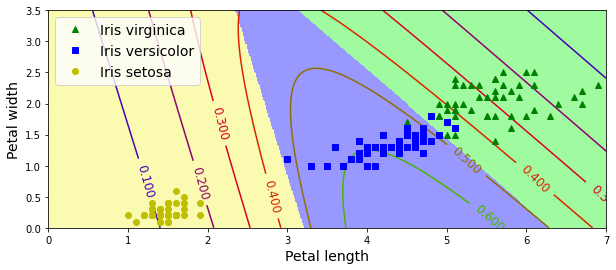

In [111]:
import matplotlib.pyplot as plt

x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
X_new_with_bias = np.c_[np.ones([len(X_new), 1]), X_new]

logits = X_new_with_bias.dot(theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

zz1 = Y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

In [114]:
logits = X_test.dot(theta)
y_proba = softmax(logits)
y_predict = np.argmax(y_proba, axis=1)

accuracy = np.mean(y_predict == y_test)
accuracy

0.9333333333333333